## Applied Machine Learning,  A simple classification task (K-NN)

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
#fruits = pd.read_csv('fruit_data_with_colors.txt',encode = 'latin1')

In [2]:
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [6]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<IPython.core.display.Javascript object>


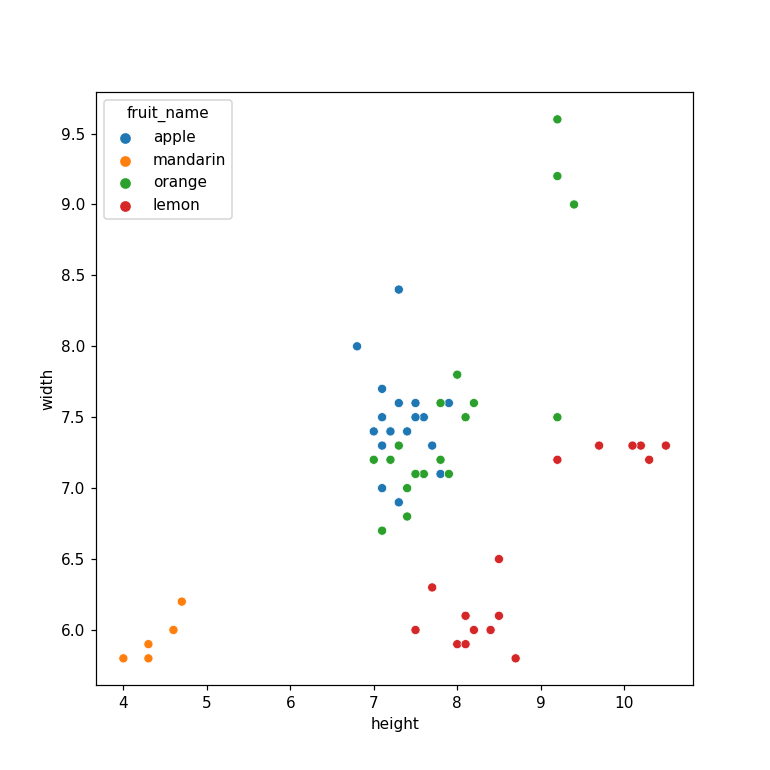

In [8]:
# Show groups with different colors using "hue"
plt.figure(figsize=(7,7))
sns.scatterplot(x=fruits.height , y=fruits.width , hue=fruits.fruit_name)
plt.show()

### Create train-test split

In [10]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
X_test.shape

(15, 3)

### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)
y_pred

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4], dtype=int64)

In [15]:
y_test1 = y_test.values
y_test1

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test1, y_pred)
ac, cm

(0.5333333333333333,
 array([[3, 0, 0, 1],
        [0, 1, 0, 0],
        [3, 0, 3, 2],
        [0, 0, 1, 1]], dtype=int64))

### Estimate the accuracy of the classifier on future data, using the test data

In [17]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [18]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [19]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


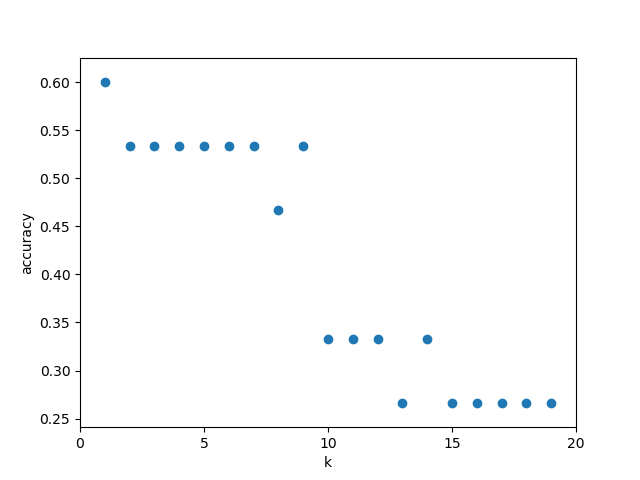

In [22]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);